In [39]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import Lasso , Ridge
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import ElasticNet

## Importing data for supervised learning

In [40]:
# Read the CSV file into a DataFrame
gapminder = pd.read_csv('C:/Users/SOWMYA/Desktop/Datasets/16_Supervised Learning with Scikit - Learn/gm_2008_region.csv')
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


In [41]:
# Create arrays for features and target variable
y = gapminder['life'].values
X_fertility = gapminder['fertility'].values

# Print the dimensions of X and y before reshaping
print('Dimensions of y before reshaping: {}'.format(y.shape))
print('Dimensions of X before reshaping: {}'.format(X_fertility.shape))

# Reshape X and y
y = y.reshape(-1, 1)
X_fertility = X_fertility.reshape(-1, 1)

# Print the dimensions of X and y after reshaping
print('Dimensions of y after reshaping: {}'.format(y.shape))
print('Dimensions of X after reshaping: {}'.format(X_fertility.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


## Exploring the Gapminder data

In [42]:
gapminder.tail()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
134,3350832,2.11,0.5,2.489764,26.39123,15317,124.2604,76.0,13.0,America
135,26952719,2.46,0.1,4.476669,25.32054,3733,124.3462,68.7,49.2,Europe & Central Asia
136,86589342,1.86,0.4,1.479347,20.91630,4085,121.9367,75.4,26.2,East Asia & Pacific
137,13114579,5.88,13.6,0.148982,20.68321,3039,132.4493,52.0,94.9,Sub-Saharan Africa
138,13495462,3.85,15.1,0.654323,22.02660,1286,131.9745,49.0,98.3,Sub-Saharan Africa


In [43]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null int64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null int64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(7), int64(2), object(1)
memory usage: 10.9+ KB


In [44]:
gapminder.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [45]:
#To Computer pair-wise correlation between the columns
gapminder.corr()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
population,1.000000,-0.061345,-0.065821,-0.010147,-0.134905,-0.045687,-0.135149,-0.005051,0.008058
fertility,-0.061345,1.000000,0.292695,-0.439747,-0.715380,-0.502615,0.527314,-0.786921,0.901704
HIV,-0.065821,0.292695,1.000000,-0.165889,-0.308700,-0.208410,0.396680,-0.604749,0.394913
CO2,-0.010147,-0.439747,-0.165889,1.000000,0.581031,0.823099,-0.280813,0.476666,-0.458186
BMI_male,-0.134905,-0.715380,-0.308700,0.581031,1.000000,0.625126,-0.447049,0.731559,-0.749691
GDP,-0.045687,-0.502615,-0.208410,0.823099,0.625126,1.000000,-0.400740,0.628999,-0.543874
BMI_female,-0.135149,0.527314,0.396680,-0.280813,-0.447049,-0.400740,1.000000,-0.658718,0.582053
life,-0.005051,-0.786921,-0.604749,0.476666,0.731559,0.628999,-0.658718,1.000000,-0.874106
child_mortality,0.008058,0.901704,0.394913,-0.458186,-0.749691,-0.543874,0.582053,-0.874106,1.000000


## Fit & predict for regression

In [46]:
# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

0.619244216774


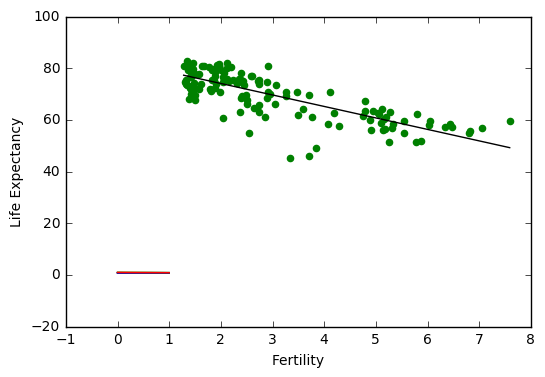

In [47]:
# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.scatter(X_fertility, y, color = 'green')
plt.plot(prediction_space, y_pred, color='black')
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')
plt.show()

Notice how the line captures the underlying trend in the data. And the performance is quite decent for this basic regression model with only one feature!

## Train/test split for regression

In [48]:
y = gapminder['life'].values
X = gapminder.drop(['life', 'Region'], axis=1).values

In [49]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print('R^2 : {}'.format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: {}'.format(rmse))

R^2 : 0.8380468731395496
Root Mean Squared Error: 3.247601080071675


## 5-fold cross-validation

In [50]:
# Compute 5-fold cross-validation scores
cv_scores = cross_val_score(reg_all, X, y , cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print('Average 5-Fold Cross Validation: {}'.format(np.mean(cv_scores)))

[ 0.81720569  0.82917058  0.90214134  0.80633989  0.94495637]
Average 5-Fold Cross Validation: 0.8599627722769967


## K-Fold CV comparison

In [51]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(reg_all, X, y, cv=3)

print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_5 = cross_val_score(reg_all, X, y ,cv=5)

print(np.mean(cvscores_5))

0.871871278257
0.859962772277


In [52]:
#  To see how long each 3-fold CV takes compared to 10-fold CV by executing

%timeit cross_val_score(reg_all, X, y, cv = 3)

%timeit cross_val_score(reg_all, X, y, cv = 5)

100 loops, best of 3: 5.82 ms per loop
100 loops, best of 3: 9.82 ms per loop


## Regularization I: Lasso Regression for feature selection

[-0.         -0.         -0.          0.          0.          0.         -0.
 -0.07087587]


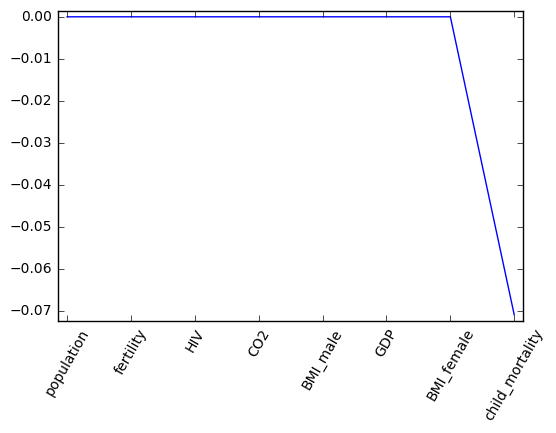

In [53]:
# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha = 0.4, normalize = True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_

print(lasso_coef)

gapminder_columns = gapminder.columns.drop(['life','Region'])
# Plot the coefficients
plt.plot(range(len(gapminder_columns)), lasso_coef)
plt.xticks(range(len(gapminder_columns)), gapminder_columns.values, rotation = 60)
plt.margins(0.02)
plt.show()

According to the lasso algorithm, it seems like 'child_mortality' is the most important feature when predicting life expectancy


## Regularization II: Ridge

In [54]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:
    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(ridge_cv_scores)
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))    

In [55]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
    
# Display the plot
#display_plot(ridge_scores, ridge_scores_std )

## Hold-out set in practice

In [57]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state= 42)

# Create the hyperparameter grid
l1_space = np.linspace(0,1,30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print('Tuned ElasticNet L1 ratio: {}'.format(gm_cv.best_params_))
print('Tuned ElasticNet R Squared: {}'.format(r2))
print('Tuned ElasticNet MSE: {}'.format(mse))

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:454: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:454: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:454: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results

Tuned ElasticNet L1 ratio: {'l1_ratio': 0.20689655172413793}
Tuned ElasticNet R Squared: 0.8668305372392511
Tuned ElasticNet MSE: 10.05791413391031
